In [1]:
from tensorboard.backend.event_processing import event_accumulator
from pathlib import Path

In [2]:
filename = Path("../tensorboard_log/single_stock_trading_portfolio_reward_new_arch_WHIRLPOOL_jax-ppo_1/events.out.tfevents.1703353119.ubuntu.22023.0")
ea = event_accumulator.EventAccumulator(filename.as_posix(), size_guidance={
    "tensors": 2000,
})

NotFoundError: b'../tensorboard_log/single_stock_trading_portfolio_reward_new_arch_WHIRLPOOL_jax-ppo_1/events.out.tfevents.1703353119.ubuntu.22023.0' does not point to valid Events file

In [67]:
ea.Reload()

In [68]:
print("Available tags: ", ea.Tags())

Available tags:  {'images': [], 'audio': [], 'histograms': [], 'scalars': ['combined_profit/combined_hold_profit', 'combined_profit/combined_sell_profit', 'combined_profit/combined_total_profit', 'counters/buy_counter', 'counters/hold_counter', 'counters/hold_with_no_shares_counter', 'counters/sell_counter', 'losses/bad_hold_loss', 'losses/bad_sell_loss', 'profits/good_hold_profit', 'profits/good_sell_profit', 'rollout/ep_len_mean', 'rollout/ep_rew_mean', 'steaks/hold_streak', 'steaks/waiting_streak', 'time/fps', 'trades/correct_trade', 'trades/wrong_trade', 'xcommons/TimeLimit.truncated', 'xcommons/available_amount', 'xcommons/buy_price', 'xcommons/buy_price_index', 'xcommons/close_price', 'xcommons/counter', 'xcommons/done', 'xcommons/max_price', 'xcommons/min_price', 'xcommons/percentage_distance_from_max', 'xcommons/percentage_distance_from_min', 'xcommons/portfolio_value', 'xcommons/portfolio_value_threshold', 'xcommons/reward', 'xcommons/reward_tracker', 'xcommons/seed', 'xcommon

In [69]:
tensors = ea.Tags().get('tensors')
tensors

['xcommons/buy_tracker/text_summary',
 'xcommons/description/text_summary',
 'xcommons/predicted_action/text_summary',
 'xcommons/sell_tracker/text_summary']

In [70]:
descriptions = ea.Tensors(tensors[1])
for d in descriptions:
    # print(d, type(d), d.step)
    print(d.step)
    print(d.tensor_proto.string_val[0].decode().replace("<br>", "\n"))
    print()
    
    # break

263168
[+] SELL Transaction #7.0: SELL without Shares. 
Min Price: 2369.00. 
 Close Price: 2534.10. 
 Max Price: 2536.60. 
 Reward: -50000. 
 Reward Tracker: 107.25. 
 Shares: 0.0. 
 Available Amount: 10058.80078125. 
 Portfolio Value: 10058.80078125. 
 Portfolio Value threshold: 10058.80078125. 
 Buy Counters: 1.0. 
 Sell Counters: 1.0. 
 Hold Counters: 2.0. 
 Waiting Period Before Purchase: 0.0 intervals. 
 HOLD Streak: 0.0. 
Holding with No Shares Counter: 3.0 intervals. 
 Buying Price: ₹0.0. 
 Buying Price Index: ₹-1.0. 
 Portfolio Value counter: 2. 
 Buy Tracker: (3.0,2517.0)->. 
Sell Tracker: (6.0,2536.60009765625)->. 


526336
[+] HOLD Transaction #12.0: Holding with shares. 
Min Price: 2369.00. 
 Close Price: 2651.95. 
 Max Price: 2651.95. 
 Reward: 343.94921875. 
 Reward Tracker: 443.845703125. 
 Shares: 3.0. 
 Available Amount: 2462.5. 
 Portfolio Value: 10418.349609375. 
 Portfolio Value threshold: 10074.400390625. 
 Buy Counters: 2.0. 
 Sell Counters: 1.0. 
 Hold Counters: 

In [5]:
import numpy as np
import polars as pl
from pathlib import Path

def load_close_prices(TICKER):
    TRAIN_FILE = Path("../datasets") / f"{TICKER}"

    CLOSE_PRICES = np.array(
        pl
        .read_parquet(TRAIN_FILE)
        .with_columns(index=pl.int_range(0, end=pl.count(), eager=False))
        .sort("index")
        .set_sorted("index")
        .group_by_dynamic(
            "index", every="1i", period="40i", include_boundaries=True, closed="right"
        )
        .agg(pl.col("Close"))
        .with_columns(pl.col("Close").list.len().alias("Count"))
        .filter(pl.col("Count") == 40)
        ["Close"]
        .to_list()
    )
    return CLOSE_PRICES

TICKER = "WHIRLPOOL.NS"
CLOSE_PRICES = load_close_prices(TICKER)
CLOSE_PRICES[0]
cp = [x[-1] for x in CLOSE_PRICES[:200]]
# cp

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:


# buy_tracker_index = [5, 47, 99]
# sell_tracker_index = [23, 65]

# buy_prices = [2533.85009765625, 2560.35009765625, 2311.0]
# sell_prices = [2671.5, 2604.5]

buy_prices = (2509.050048828125, 2670.35009765625, 2553.050048828125, 2282.0)
sell_prices = (2728.89990234375, 2682.449951171875)

buy_prices = (2511.14990234375, 2537.449951171875, 2448.0)
sell_prices = (2682.89990234375, 2650.0, 2470.39990234375)

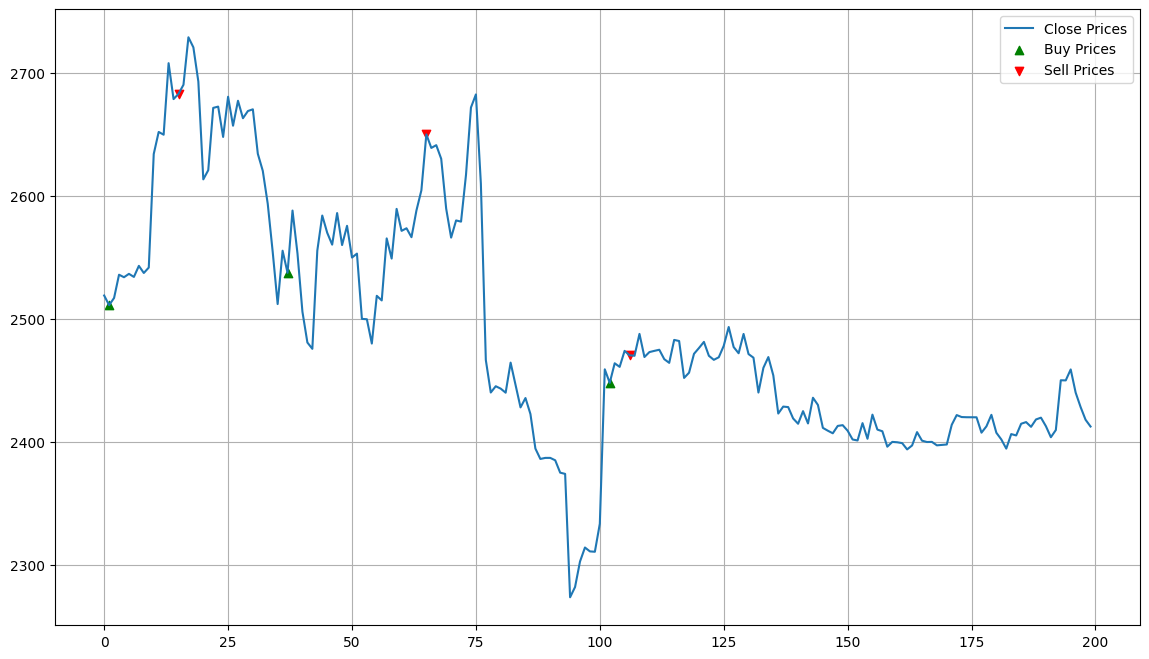

In [6]:


# Your close prices
close_prices = cp

# Your buy and sell prices
# buy_prices = [2533.85009765625, 2560.35009765625, 2311.0]
# sell_prices = [2671.5, 2604.5]

# Create a list of indices for buy and sell prices
buy_indices = [close_prices.index(price) for price in buy_prices if price in close_prices]
sell_indices = [close_prices.index(price) for price in sell_prices if price in close_prices]

# Plot close prices
plt.figure(figsize=(14, 8))
plt.plot(close_prices, label='Close Prices', )

# Plot buy prices as green dots
plt.scatter(buy_indices, [close_prices[i] for i in buy_indices], color='green', marker='^', label='Buy Prices')

# Plot sell prices as red dots
plt.scatter(sell_indices, [close_prices[i] for i in sell_indices], color='red', marker='v', label='Sell Prices')

plt.grid(True)
plt.legend()
plt.show()

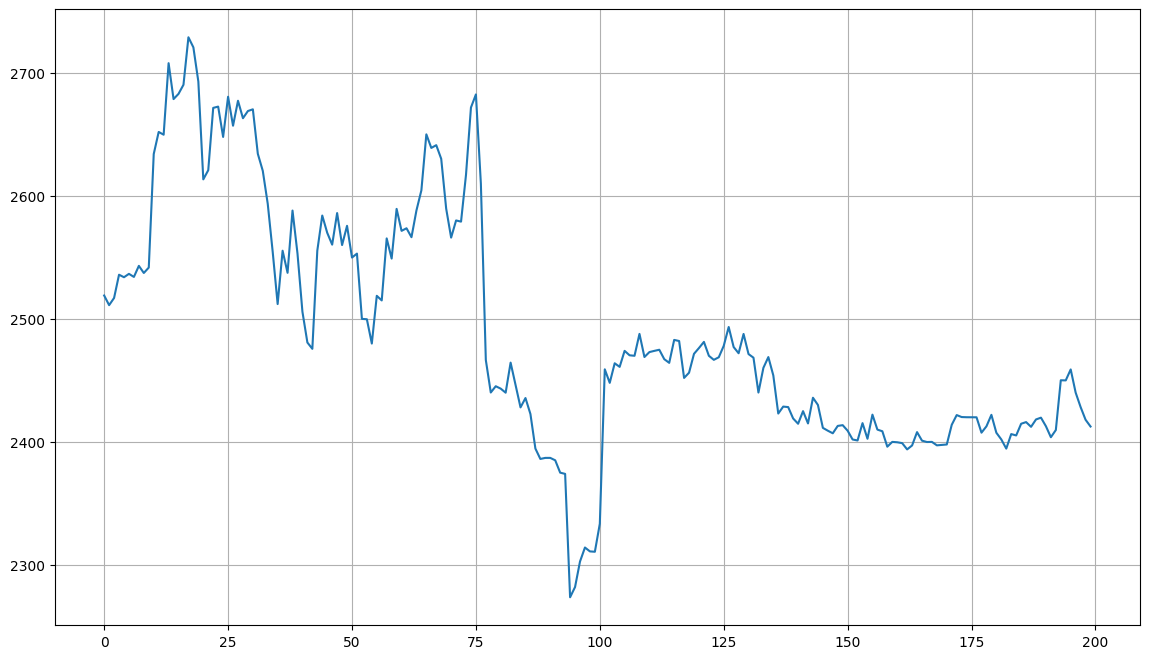

In [63]:
plt.figure(figsize=(14, 8))
plt.plot(cp)
plt.grid(True)
plt.show()